In [331]:
import pandas as pd
import numpy as np
from  datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt 
import matplotlib as mpl
%matplotlib inline
import plotly.express as px 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D

In [332]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [333]:
stroke.sample(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1204,41565,Female,33.0,0,0,No,Private,Urban,121.19,22.1,never smoked,0
2057,1499,Female,43.0,0,0,Yes,Govt_job,Rural,72.13,42.6,never smoked,0
2754,27717,Female,56.0,0,0,Yes,Self-employed,Urban,112.16,25.7,Unknown,0
2595,12228,Male,13.0,0,0,No,children,Rural,97.97,24.5,never smoked,0
803,58291,Female,52.0,0,0,Yes,Private,Rural,79.80,32.3,formerly smoked,0
5003,63158,Male,17.0,0,0,No,Private,Urban,63.28,40.2,Unknown,0
4750,16902,Female,70.0,0,1,Yes,Self-employed,Urban,240.69,NaN,smokes,0
3220,69379,Female,64.0,1,0,Yes,Self-employed,Urban,93.78,24.4,never smoked,0
768,59521,Male,33.0,0,0,Yes,Private,Rural,74.88,31.6,smokes,0
3678,47784,Female,5.0,0,0,No,children,Rural,123.49,19.5,Unknown,0


### Data Preparation

In [334]:
# Caution: Genders are 3

stroke['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [335]:
# count how many Other we have

stroke[stroke['gender'] == 'Other'].count()

id                   1
gender               1
age                  1
hypertension         1
heart_disease        1
ever_married         1
work_type            1
Residence_type       1
avg_glucose_level    1
bmi                  1
smoking_status       1
stroke               1
dtype: int64

In [336]:
# to convert to int64 later

stroke['age'].unique()

array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01,
       1.08e+00, 1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e

In [337]:
stroke['hypertension'].unique()

array([0, 1], dtype=int64)

In [338]:
stroke['heart_disease'].unique()

array([1, 0], dtype=int64)

In [339]:
stroke['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [340]:
# to convert children to Minors later

stroke['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [341]:
stroke['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [342]:
stroke['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [343]:
# drop NaNs later  OR  fill NaNs with the mean of the other bmi values: df.bmi.fillna(df.bmi.mean(),inplace=True)


stroke['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [344]:
stroke['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [345]:
# count how many people with Stroke we have

stroke[stroke['stroke'] == 1].count()

id                   249
gender               249
age                  249
hypertension         249
heart_disease        249
ever_married         249
work_type            249
Residence_type       249
avg_glucose_level    249
bmi                  209
smoking_status       249
stroke               249
dtype: int64

In [346]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [347]:
stroke.shape

(5110, 12)

In [348]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [349]:
stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [260]:
stroke.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [261]:
stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Data Cleaning

In [262]:
# repalce children with Minors

stroke['work_type'] = stroke['work_type'].str.replace('children', 'Minors')

In [263]:
stroke.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2341,10649,Female,82.0,0,0,Yes,Private,Urban,80.00,33.6,never smoked,0
4609,51889,Female,40.0,0,0,Yes,Private,Urban,58.64,33.0,never smoked,0
1141,30352,Male,57.0,0,0,Yes,Private,Rural,90.06,29.8,Unknown,0
3832,64662,Female,23.0,0,0,No,Private,Rural,58.01,35.3,never smoked,0
4072,31390,Female,61.0,0,0,Yes,Private,Rural,71.40,29.2,formerly smoked,0
3776,55885,Male,19.0,0,0,No,Private,Urban,119.58,24.8,Unknown,0
1168,69312,Female,48.0,0,0,Yes,Self-employed,Urban,99.29,31.2,never smoked,0
1063,42821,Female,13.0,0,0,No,Private,Rural,60.69,24.0,smokes,0
2078,36946,Male,74.0,0,0,Yes,Private,Rural,92.67,26.3,formerly smoked,0
206,37060,Female,81.0,0,0,Yes,Private,Rural,80.13,23.4,never smoked,1


In [264]:
# convert column 'age' from float to int64

stroke['age'] = stroke['age'].astype('int64')

In [265]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


In [266]:
stroke.tail(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5095,68598,Male,1,0,0,No,Minors,Rural,79.15,17.4,Unknown,0
5096,41512,Male,57,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0
5097,64520,Male,68,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5098,579,Male,9,0,0,No,Minors,Urban,71.88,17.5,Unknown,0
5099,7293,Male,40,0,0,Yes,Private,Rural,83.94,NaN,smokes,0
5100,68398,Male,82,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13,0,0,No,Minors,Rural,103.08,18.6,Unknown,0


In [267]:
# DROP the NaNs in column 'bmi' with resetting index after drop

stroke = stroke.dropna().reset_index(drop=True)

In [268]:
stroke.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4904,14180,Female,13,0,0,No,Minors,Rural,103.08,18.6,Unknown,0
4905,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
4908,44679,Female,44,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [269]:
stroke.shape

(4909, 12)

In [270]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.854145,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.575986,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [271]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13,0,0,No,Minors,Rural,103.08,18.6,Unknown,0
4905,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [272]:
# Create AGE GROUPS  

stroke['Age_Group'] = pd.cut(stroke['age'],bins = [0,18,29,40,51,62,75, float('inf')],
                                labels = ['0-17','18-28','29-39','40-50','51-61','62-75','Over 75'],
                                right = False)
Age_Group = stroke['Age_Group'].value_counts().sort_values(ascending = False)
Age_Group

Age_Group
51-61      862
0-17       836
40-50      786
29-39      680
62-75      668
18-28      598
Over 75    479
Name: count, dtype: int64

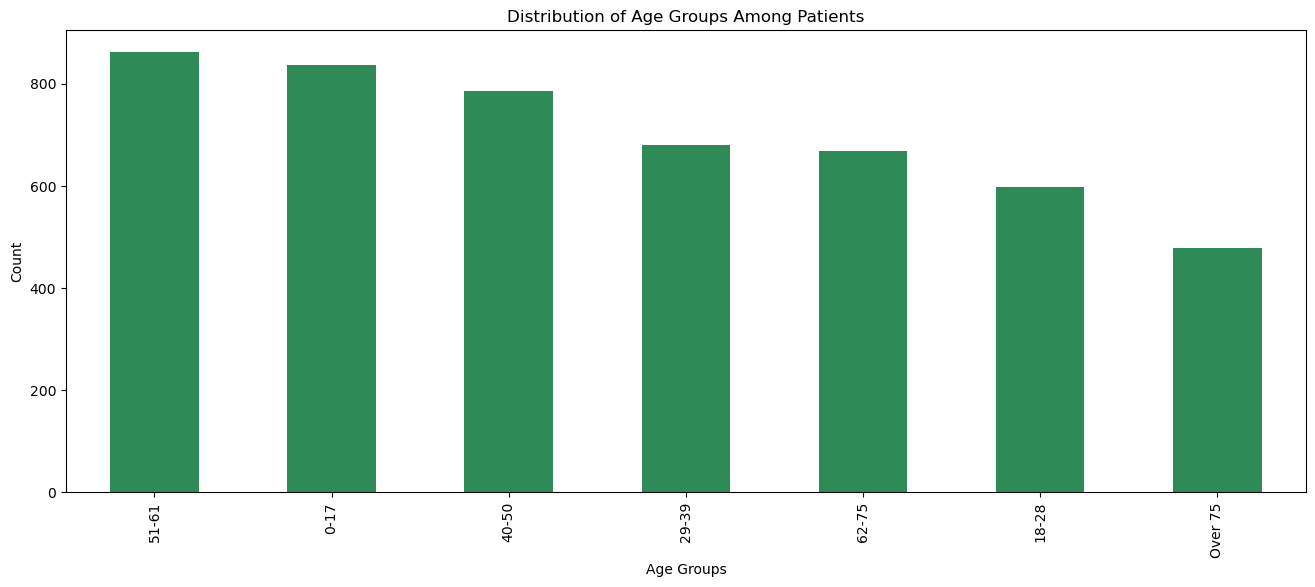

In [273]:
plt.figure(figsize=(16,6))
Age_Group.plot(kind = 'bar', color='#2E8B57')
plt.title('Distribution of Age Groups Among Patients')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

In [274]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,62-75
1,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Over 75
2,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-50
3,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Over 75
4,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Over 75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13,0,0,No,Minors,Rural,103.08,18.6,Unknown,0,0-17
4905,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Over 75
4906,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,29-39
4907,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,51-61


In [275]:
# checking how many under age 18 are not Minors (because this is not correct)

stroke[(stroke['age'] < 18) & (stroke['work_type'] != 'Minors')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
211,16523,Female,8,0,0,No,Private,Urban,110.89,17.6,Unknown,0,0-17
213,46136,Male,14,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0,0-17
244,26325,Male,14,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0,0-17
248,70970,Female,17,0,0,No,Self-employed,Urban,82.18,23.4,Unknown,0,0-17
353,23462,Female,17,0,0,No,Private,Urban,87.52,39.2,never smoked,0,0-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,66650,Female,17,0,0,No,Private,Urban,68.86,41.1,never smoked,0,0-17
4786,61801,Male,15,0,0,No,Private,Urban,65.05,24.6,Unknown,0,0-17
4807,63158,Male,17,0,0,No,Private,Urban,63.28,40.2,Unknown,0,0-17
4808,27435,Female,17,0,0,No,Private,Urban,82.64,31.1,Unknown,0,0-17


In [276]:
# the whole df DOES NOT take the change with this code:

# stroke[(stroke['age'] < 18) & (stroke['work_type'] != 'Minors')].\
# replace({'Private', 'Govt_job','Self-employed', 'Never_worked'}, 'Minors')  

# we use .mask() with inplace = True instead:

stroke['work_type'].mask((stroke['age'] < 18) & (stroke['work_type'] != 'Minors'),'Minors', inplace=True)

In [277]:
stroke[(stroke['age'] < 18) & (stroke['work_type'] != 'Minors')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group


In [278]:
# ok change done! 
# check

stroke.iloc[211]

id                     16523
gender                Female
age                        8
hypertension               0
heart_disease              0
ever_married              No
work_type             Minors
Residence_type         Urban
avg_glucose_level     110.89
bmi                     17.6
smoking_status       Unknown
stroke                     0
Age_Group               0-17
Name: 211, dtype: object

In [279]:
# check

stroke.iloc[4879]

id                      8203
gender                  Male
age                       17
hypertension               0
heart_disease              0
ever_married              No
work_type             Minors
Residence_type         Rural
avg_glucose_level     106.56
bmi                     21.0
smoking_status       Unknown
stroke                     0
Age_Group               0-17
Name: 4879, dtype: object

In [280]:
# check

stroke.iloc[4755]

id                          66650
gender                     Female
age                            17
hypertension                    0
heart_disease                   0
ever_married                   No
work_type                  Minors
Residence_type              Urban
avg_glucose_level           68.86
bmi                          41.1
smoking_status       never smoked
stroke                          0
Age_Group                    0-17
Name: 4755, dtype: object

In [281]:
# convert to .csv format

stroke.to_csv('Stroke_data.csv', index=False)

In [282]:
# check how it appears after converting to csv

stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,62-75
1,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Over 75
2,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-50
3,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Over 75
4,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Over 75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13,0,0,No,Minors,Rural,103.08,18.6,Unknown,0,0-17
4905,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Over 75
4906,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,29-39
4907,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,51-61


In [283]:
# check for duplicates

duplicate_values = stroke['id'].duplicated()

In [284]:
duplicate_values

0       False
1       False
2       False
3       False
4       False
        ...  
4904    False
4905    False
4906    False
4907    False
4908    False
Name: id, Length: 4909, dtype: bool

In [285]:
# READY for importing to Power Bi

### EDA

In [286]:
stroke[(stroke['age'] >= 65  ) & (stroke['age'] <= 75)].count()

id                   522
gender               522
age                  522
hypertension         522
heart_disease        522
ever_married         522
work_type            522
Residence_type       522
avg_glucose_level    522
bmi                  522
smoking_status       522
stroke               522
Age_Group            522
dtype: int64

In [287]:
stroke[(stroke['age'] >= 75)].count()

id                   479
gender               479
age                  479
hypertension         479
heart_disease        479
ever_married         479
work_type            479
Residence_type       479
avg_glucose_level    479
bmi                  479
smoking_status       479
stroke               479
Age_Group            479
dtype: int64

### Checking stroke incidents

In [288]:
# CHECKING STROKE = 1 IN OUR TOTAL DATASET


In [289]:
# 209 people out of 4909 had stroke

stroke[(stroke['stroke'] == 1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,62-75
1,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Over 75
2,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-50
3,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Over 75
4,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Over 75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,40460,Female,68,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1,62-75
205,17739,Male,57,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1,51-61
206,49669,Female,14,0,0,No,Minors,Rural,57.93,30.9,Unknown,1,0-17
207,27153,Female,75,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1,Over 75


In [290]:
# Checking STROKE = 1 AND SMOKING

In [291]:
# 57 people

stroke[(stroke['stroke'] == 1) & (stroke['smoking_status'] == 'formerly smoked')].shape

(57, 13)

In [292]:
# 39 people

stroke[(stroke['stroke'] == 1) & (stroke['smoking_status'] == 'smokes')].shape

(39, 13)

In [293]:
# CHECKING STROKE = 1 AND HYPERTENSION

In [294]:
# 60 people 
stroke[(stroke['stroke'] == 1) & (stroke['hypertension'] == 1)].shape

(60, 13)

In [295]:
# CHECKING STROKE = 1 AND HEART DISEASE

In [296]:
# 40 people

stroke[(stroke['stroke'] == 1) & (stroke['heart_disease'] == 1)].shape

(40, 13)

In [297]:
# CHECKING STROKE = 1 AND GENDER

In [298]:
#  120 woman

stroke[(stroke['stroke'] == 1) & (stroke['gender'] == 'Female')].shape

(120, 13)

In [299]:
#  89 man

stroke[(stroke['stroke'] == 1) & (stroke['gender'] == 'Male')].shape

(89, 13)

In [300]:
stroke[(stroke['stroke'] == 1) & (stroke['age'] <= 20)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
206,49669,Female,14,0,0,No,Minors,Rural,57.93,30.9,Unknown,1,0-17


In [301]:
stroke[(stroke['stroke'] == 1) & (stroke['age'] >= 40) & (stroke['age'] <=50)].count()

id                   15
gender               15
age                  15
hypertension         15
heart_disease        15
ever_married         15
work_type            15
Residence_type       15
avg_glucose_level    15
bmi                  15
smoking_status       15
stroke               15
Age_Group            15
dtype: int64

In [302]:
stroke[(stroke['stroke'] == 1) & stroke['age'].isin(range(40, 51))].count()

id                   15
gender               15
age                  15
hypertension         15
heart_disease        15
ever_married         15
work_type            15
Residence_type       15
avg_glucose_level    15
bmi                  15
smoking_status       15
stroke               15
Age_Group            15
dtype: int64

In [303]:
#### Checking other conditions

In [304]:
stroke[(stroke['age'] == 18) & (stroke['ever_married'] == 'Yes')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
1108,39661,Male,18,0,0,Yes,Private,Rural,140.52,27.4,never smoked,0,18-28


In [305]:
stroke[(stroke['stroke'] == 1) & (stroke['hypertension'] == 1) & (stroke['heart_disease'] == 1)].count()

id                   11
gender               11
age                  11
hypertension         11
heart_disease        11
ever_married         11
work_type            11
Residence_type       11
avg_glucose_level    11
bmi                  11
smoking_status       11
stroke               11
Age_Group            11
dtype: int64

In [306]:
stroke[(stroke['stroke'] == 1) & (stroke['hypertension'] == 1) & (stroke['heart_disease'] == 1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
5,53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,62-75
29,712,Female,82,1,1,No,Private,Rural,84.03,26.5,formerly smoked,1,Over 75
96,53401,Male,71,1,1,No,Govt_job,Rural,216.94,30.9,never smoked,1,62-75
120,37651,Female,69,1,1,No,Self-employed,Urban,72.17,36.8,never smoked,1,62-75
150,28378,Male,61,1,1,Yes,Private,Urban,112.24,37.4,smokes,1,51-61
153,67895,Female,82,1,1,Yes,Govt_job,Urban,215.94,27.9,formerly smoked,1,Over 75
158,69112,Male,68,1,1,Yes,Private,Rural,271.74,31.1,smokes,1,62-75
164,68627,Male,80,1,1,Yes,Private,Urban,175.29,31.5,formerly smoked,1,Over 75
180,29552,Female,55,1,1,Yes,Private,Urban,210.40,40.0,smokes,1,51-61
182,20463,Male,81,1,1,Yes,Private,Urban,250.89,28.1,smokes,1,Over 75


In [307]:
#### Checking Smoking at ages <=15  

In [308]:
stroke[(stroke['age'] <= 15) & (stroke['smoking_status'] == 'smokes')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Group
1005,42821,Female,13,0,0,No,Minors,Rural,60.69,24.0,smokes,0,0-17
1433,4833,Female,12,0,0,No,Minors,Rural,207.45,25.4,smokes,0,0-17
1908,64128,Male,10,0,0,No,Minors,Urban,63.08,20.5,smokes,0,0-17


In [309]:
stroke[(stroke['age'] <= 15) & (stroke['smoking_status'] == 'formerly smoked')].shape

(18, 13)

In [310]:
stroke[(stroke['age'] <= 15)].shape

(727, 13)

In [311]:
# convert to .csv 

stroke.to_csv('Stroke_data.csv', index=False)

### Graphs

In [312]:
### Categorical Vairables

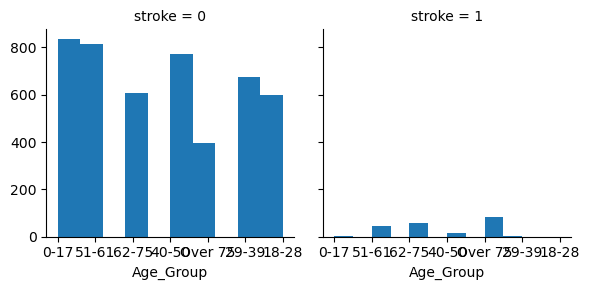

In [313]:
stroke2 = sns.FacetGrid(stroke,col='stroke') #break it for time
stroke2.map(plt.hist,'Age_Group') #make a histogram for tip (broken down by times)

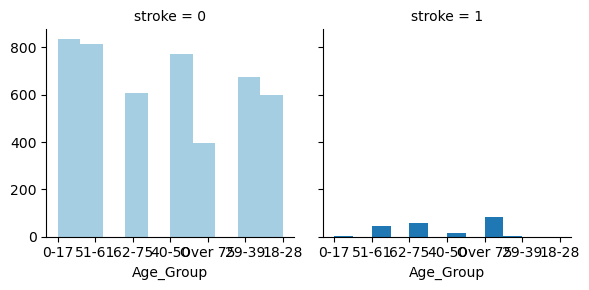

In [314]:
# or
stroke2 = sns.FacetGrid(stroke,col='stroke', hue = 'stroke', palette = 'Paired') 
stroke2.map(plt.hist,'Age_Group') 

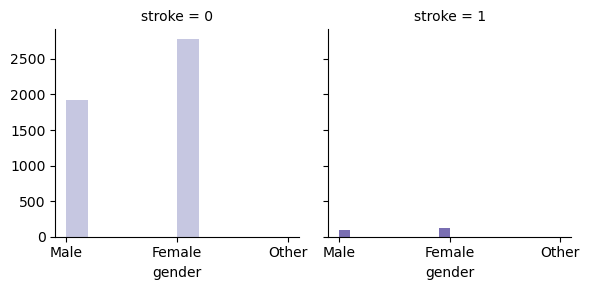

In [315]:
stroke2 = sns.FacetGrid(stroke,col='stroke', hue = 'stroke', palette = 'Purples')
stroke2.map(plt.hist,'gender') 

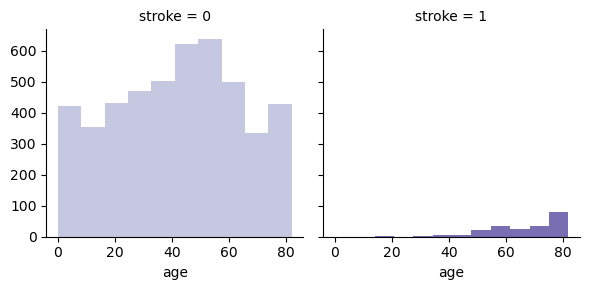

In [316]:
stroke2 = sns.FacetGrid(stroke,col='stroke',  hue = 'stroke', palette = 'Purples')
stroke2.map(plt.hist,'age') 

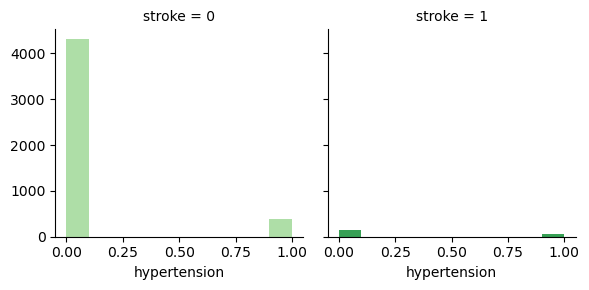

In [317]:
stroke2 = sns.FacetGrid(stroke,col='stroke', hue = 'stroke', palette = 'Greens')
stroke2.map(plt.hist,'hypertension')

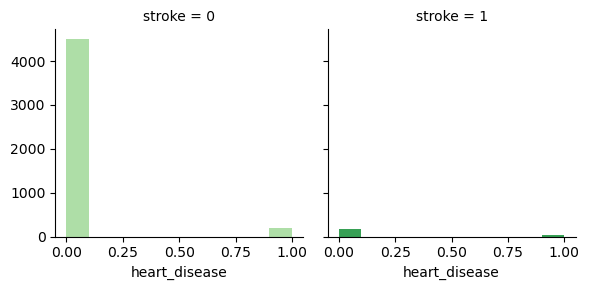

In [318]:
stroke2 = sns.FacetGrid(stroke,col='stroke', hue = 'stroke', palette = 'Greens')
stroke2.map(plt.hist,'heart_disease') 

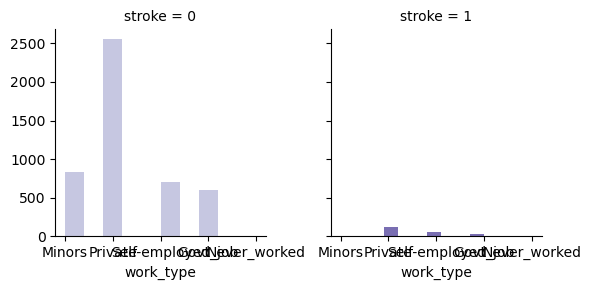

In [319]:
stroke2 = sns.FacetGrid(stroke,col='stroke', hue = 'stroke', palette = 'Purples')
stroke2.map(plt.hist,'work_type') 

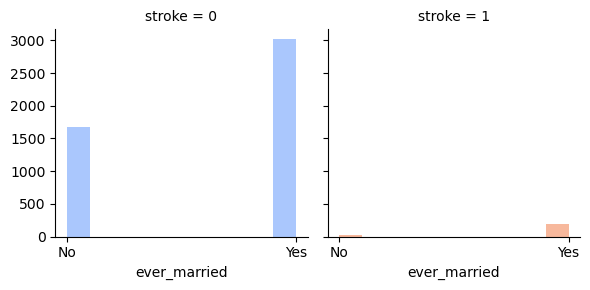

In [320]:
stroke2 = sns.FacetGrid(stroke,col='stroke', hue = 'stroke', palette = 'coolwarm')
stroke2.map(plt.hist,'ever_married') 

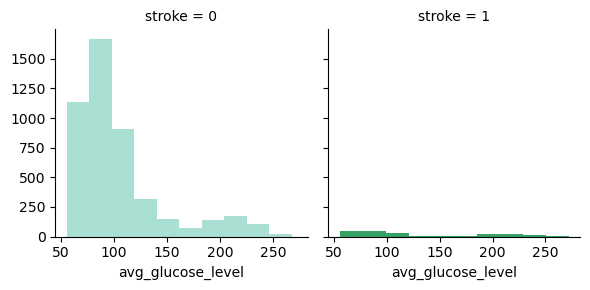

In [321]:
stroke2 = sns.FacetGrid(stroke,col='stroke', hue = 'stroke', palette = 'BuGn')
stroke2.map(plt.hist,'avg_glucose_level') 

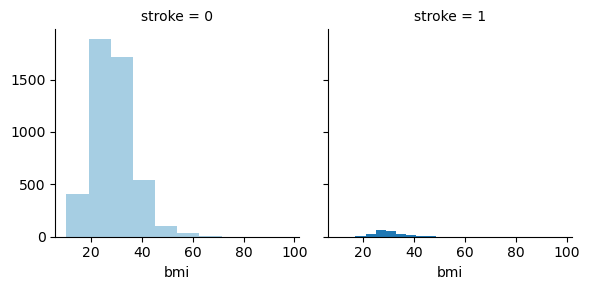

In [322]:
stroke2 = sns.FacetGrid(stroke,col='stroke', hue = 'stroke', palette = 'Paired')
stroke2.map(plt.hist,'bmi') 

C:\Users\MariaV\AppData\Local\Temp\ipykernel_14920\3794961825.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=stroke['work_type'],y=stroke['bmi'], palette='GnBu')


<Axes: xlabel='work_type', ylabel='bmi'>

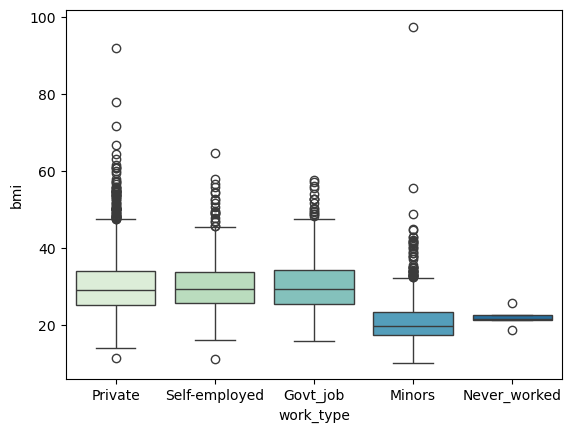

In [323]:
sns.boxplot(x=stroke['work_type'],y=stroke['bmi'], palette='GnBu')

<Axes: xlabel='age', ylabel='smoking_status'>

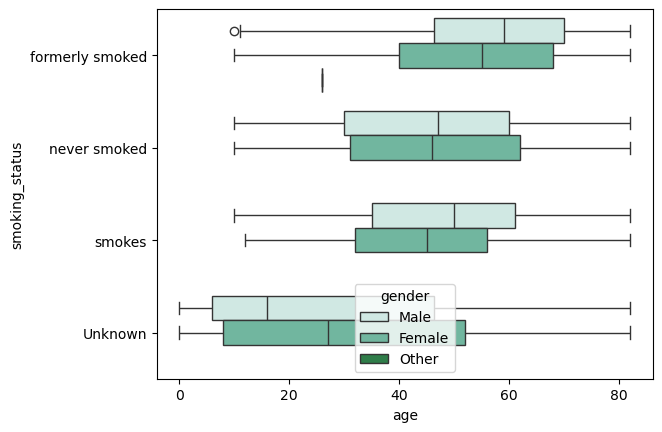

In [324]:
sns.boxplot(x="age", y="smoking_status", hue="gender",palette='BuGn', data=stroke)

<Axes: xlabel='work_type', ylabel='stroke'>

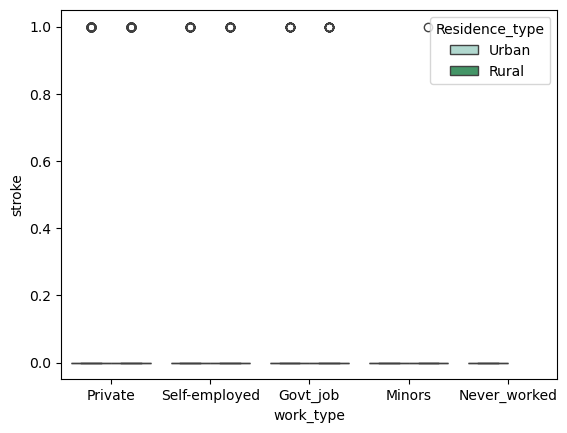

In [325]:
sns.boxplot(x="work_type", y="stroke", hue="Residence_type", palette='BuGn', data=stroke)

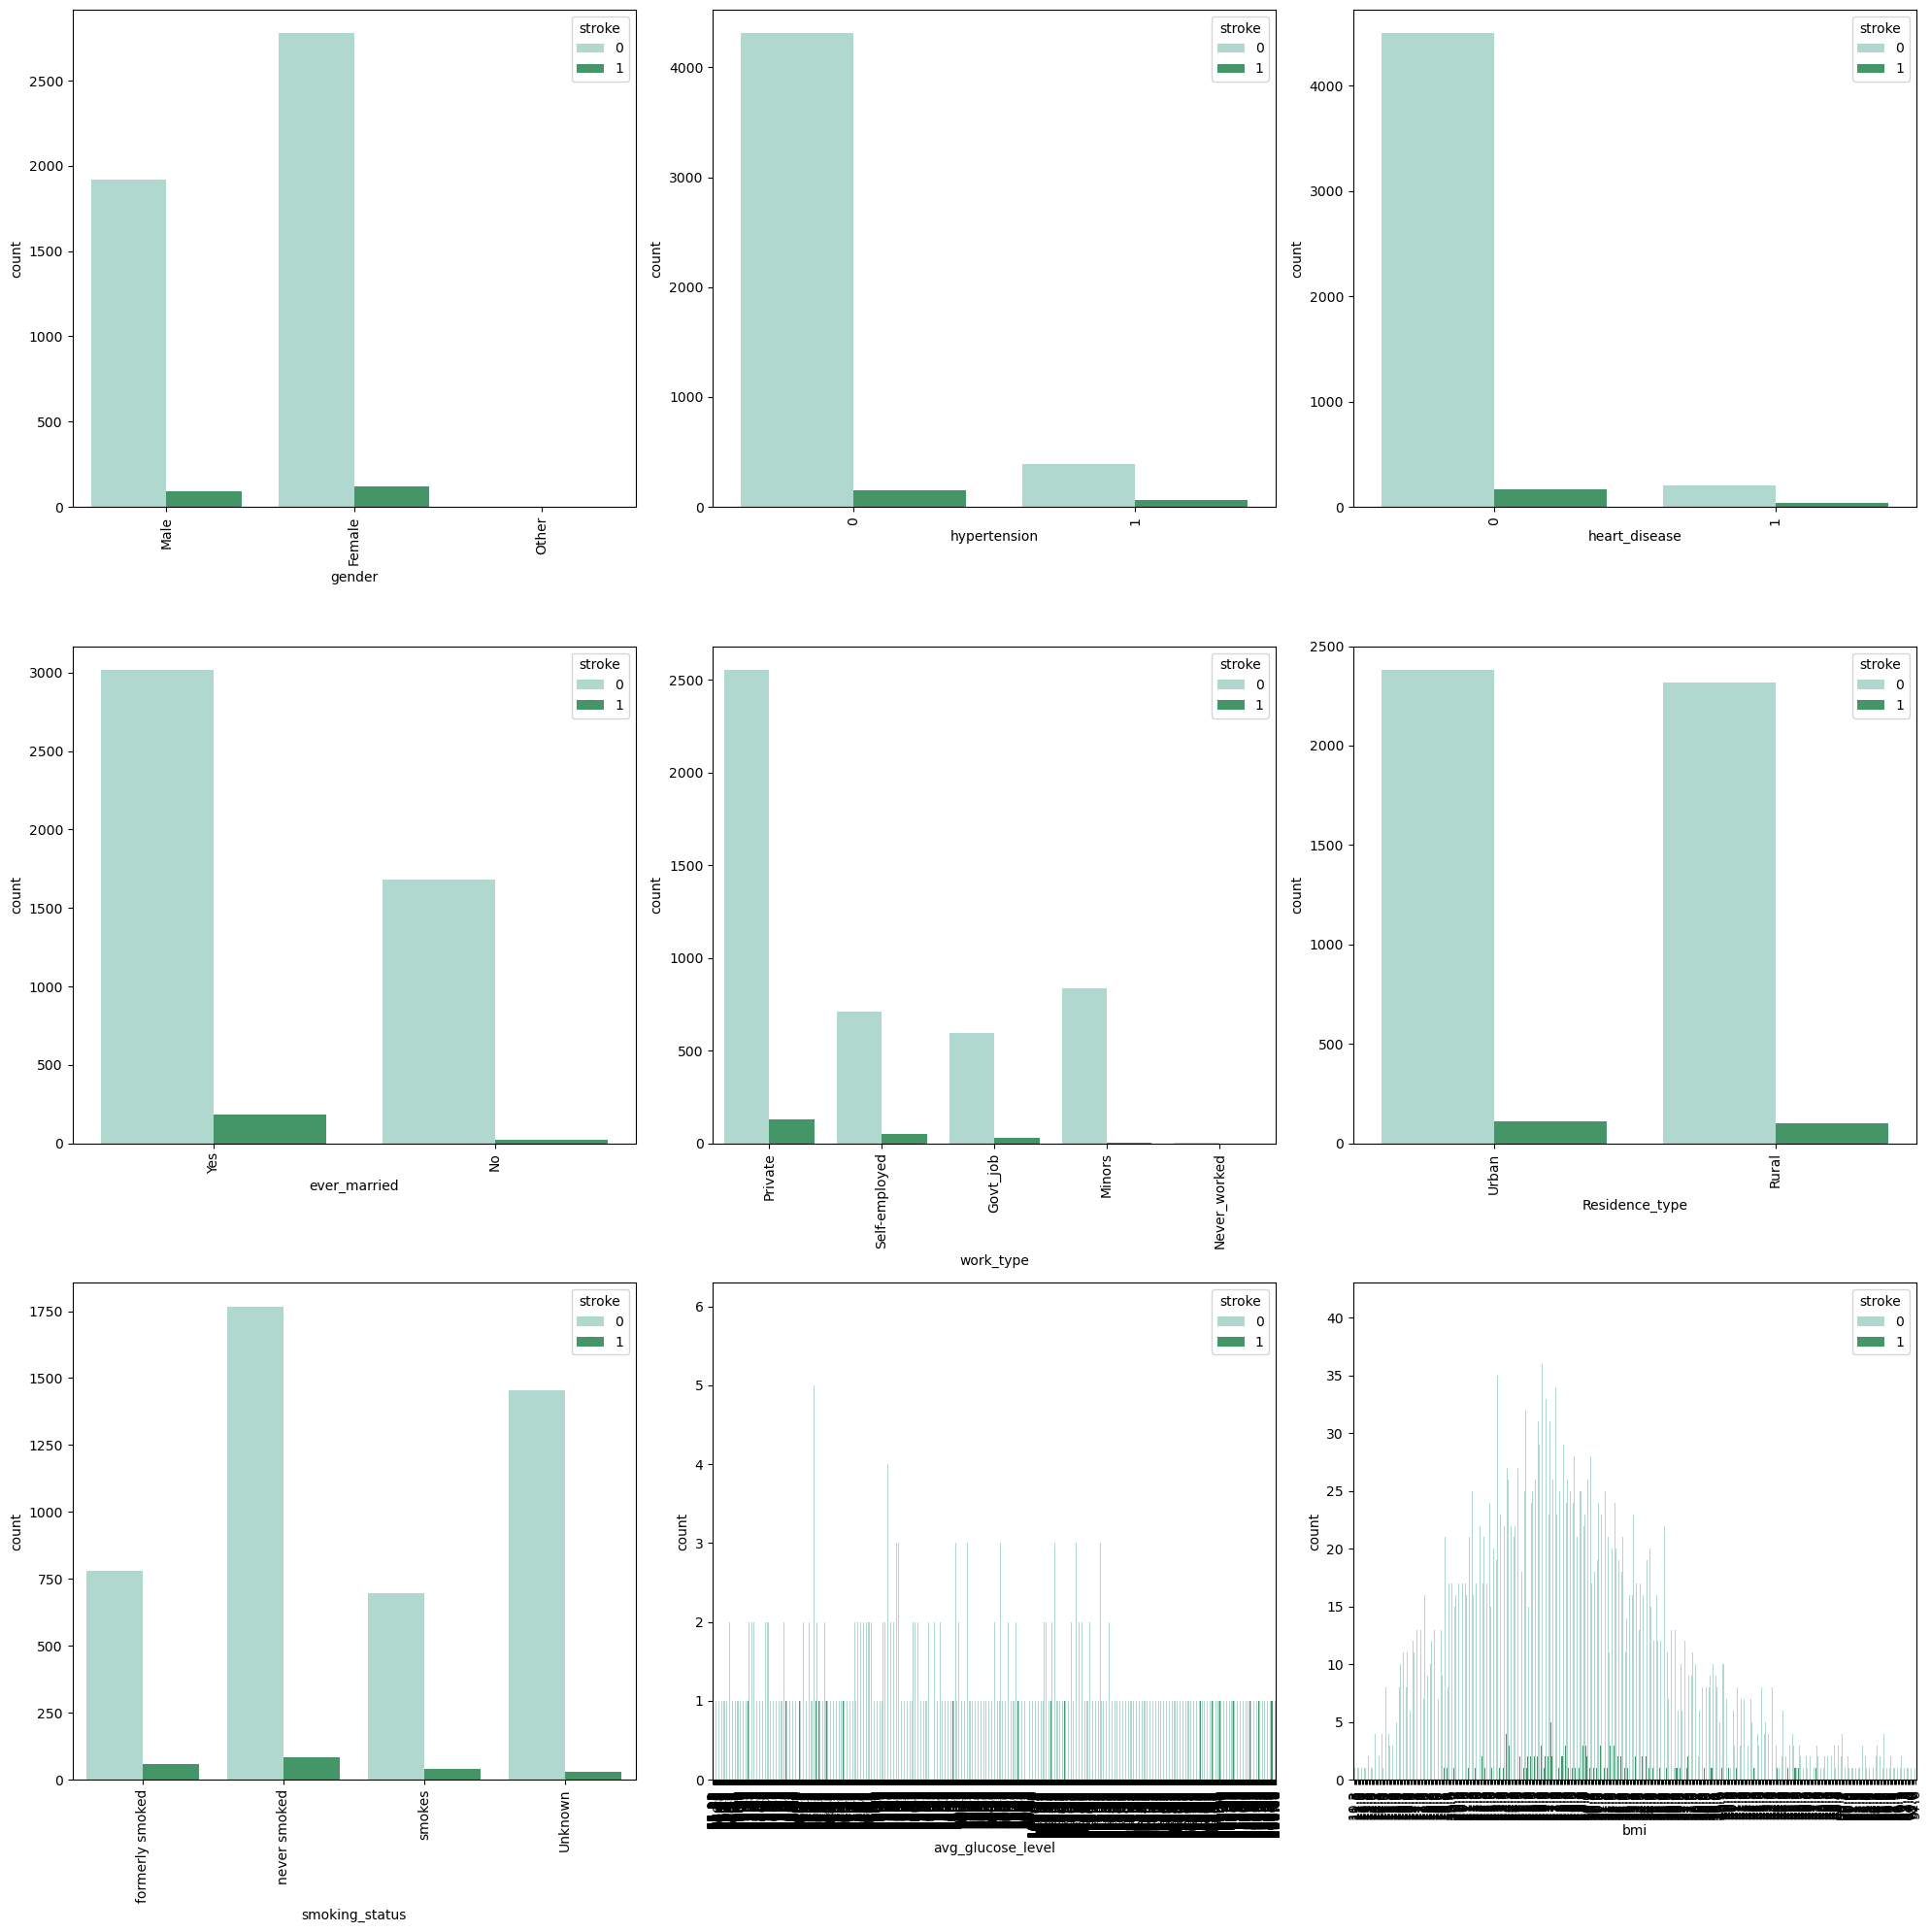

In [326]:
categorical_variables = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status',
                         'avg_glucose_level','bmi']
continuous_variables = ['age', 'avg_glucose_level', 'bmi']


# Plot the variables against the target variable 'stroke'
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

for var, subplot in zip(categorical_variables, axs.flatten()):
    sns.countplot(x=stroke[var], hue=stroke['stroke'], ax=subplot, palette='BuGn')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

C:\Users\MariaV\AppData\Local\Temp\ipykernel_14920\3055462690.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(data=stroke, x=i,palette='Greens')


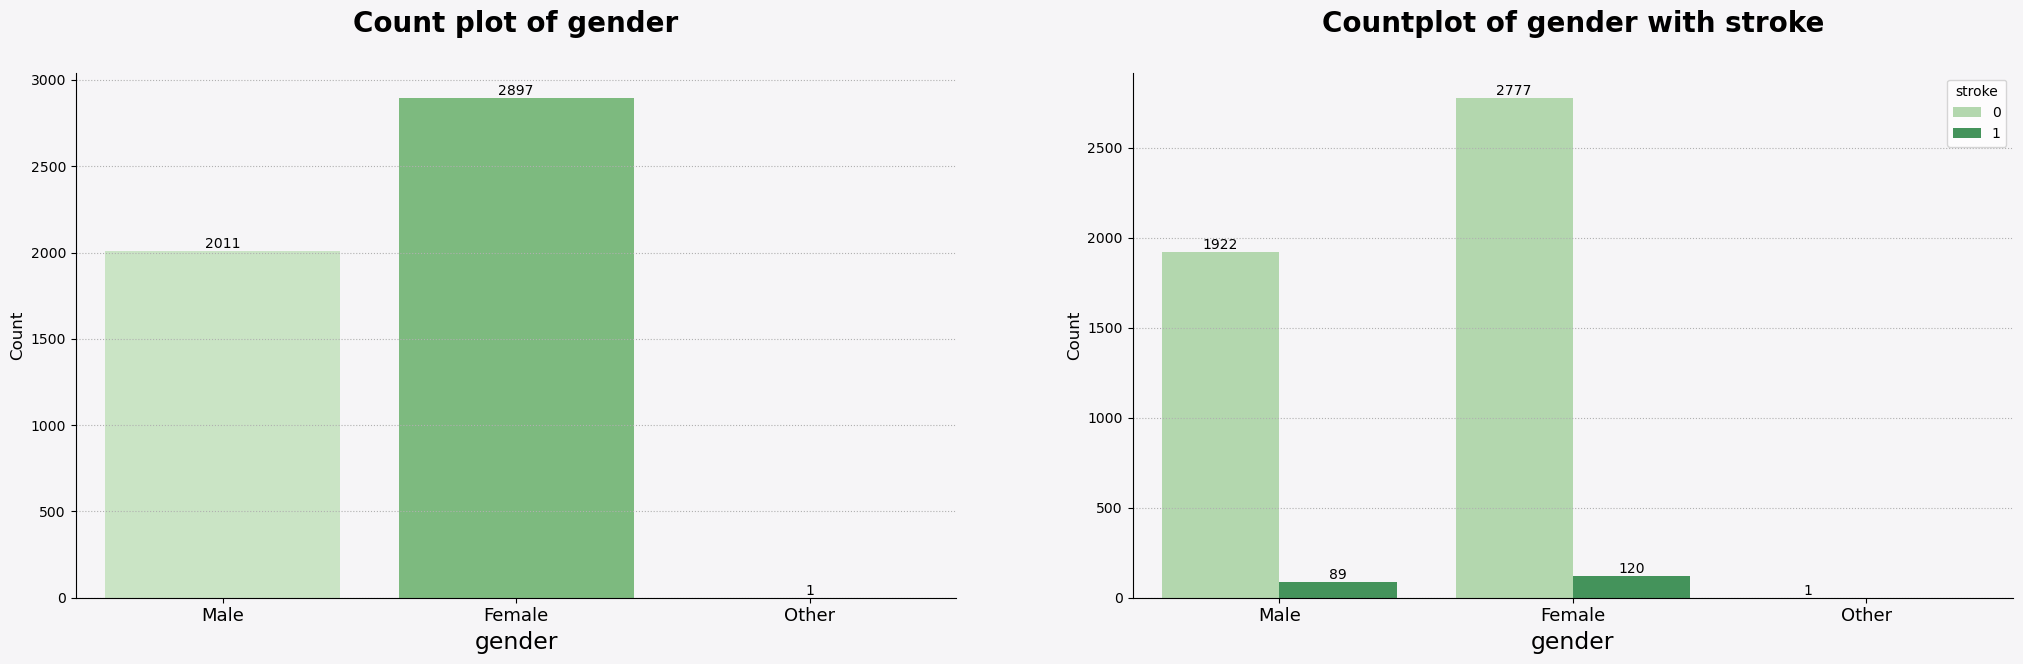

C:\Users\MariaV\AppData\Local\Temp\ipykernel_14920\3055462690.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(data=stroke, x=i,palette='Greens')


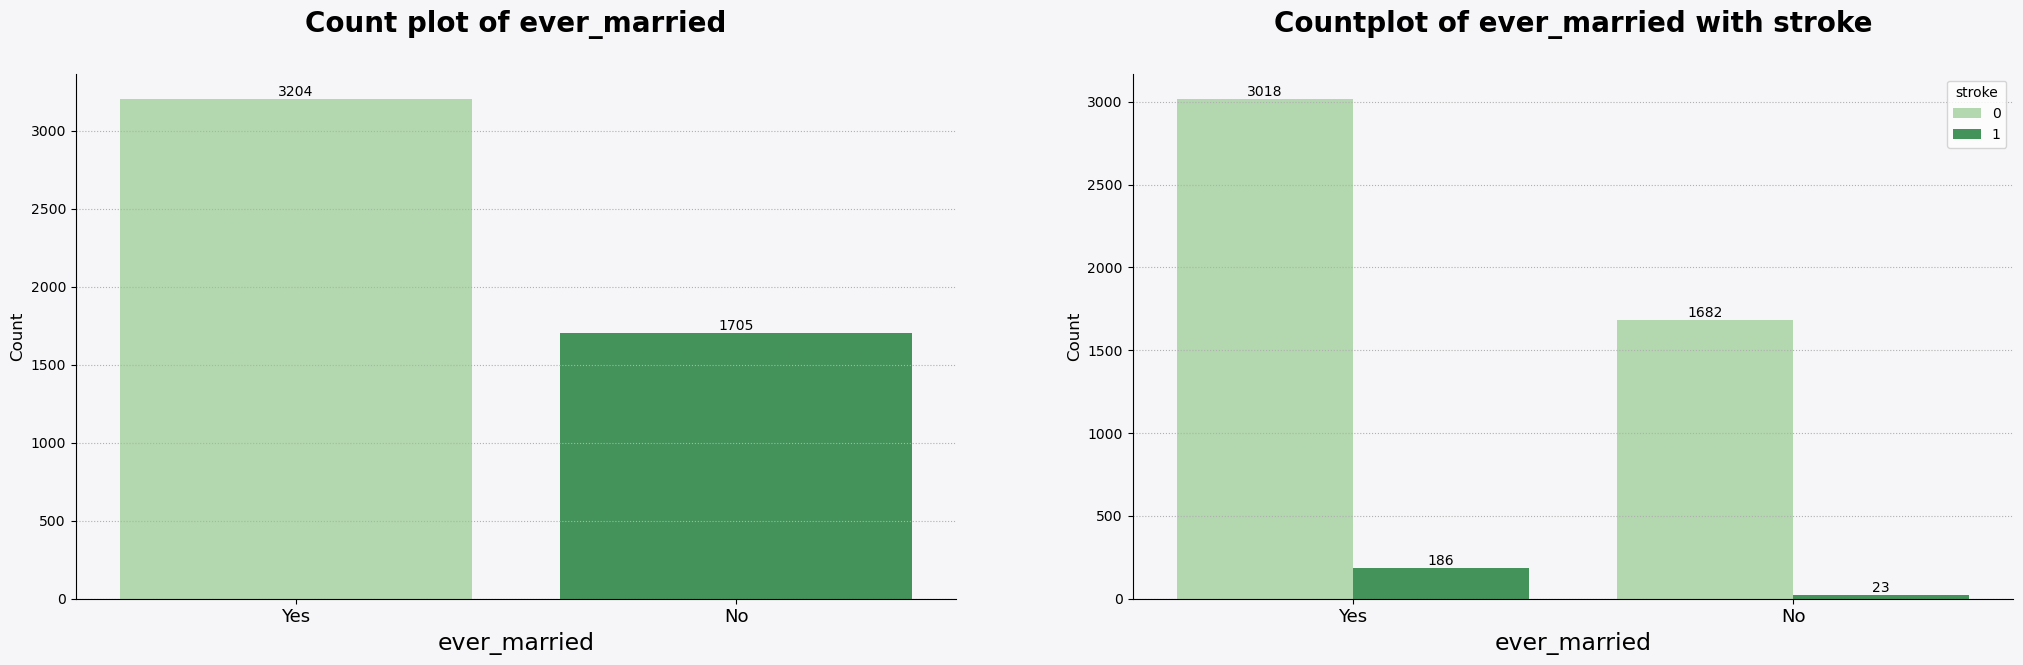

C:\Users\MariaV\AppData\Local\Temp\ipykernel_14920\3055462690.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(data=stroke, x=i,palette='Greens')


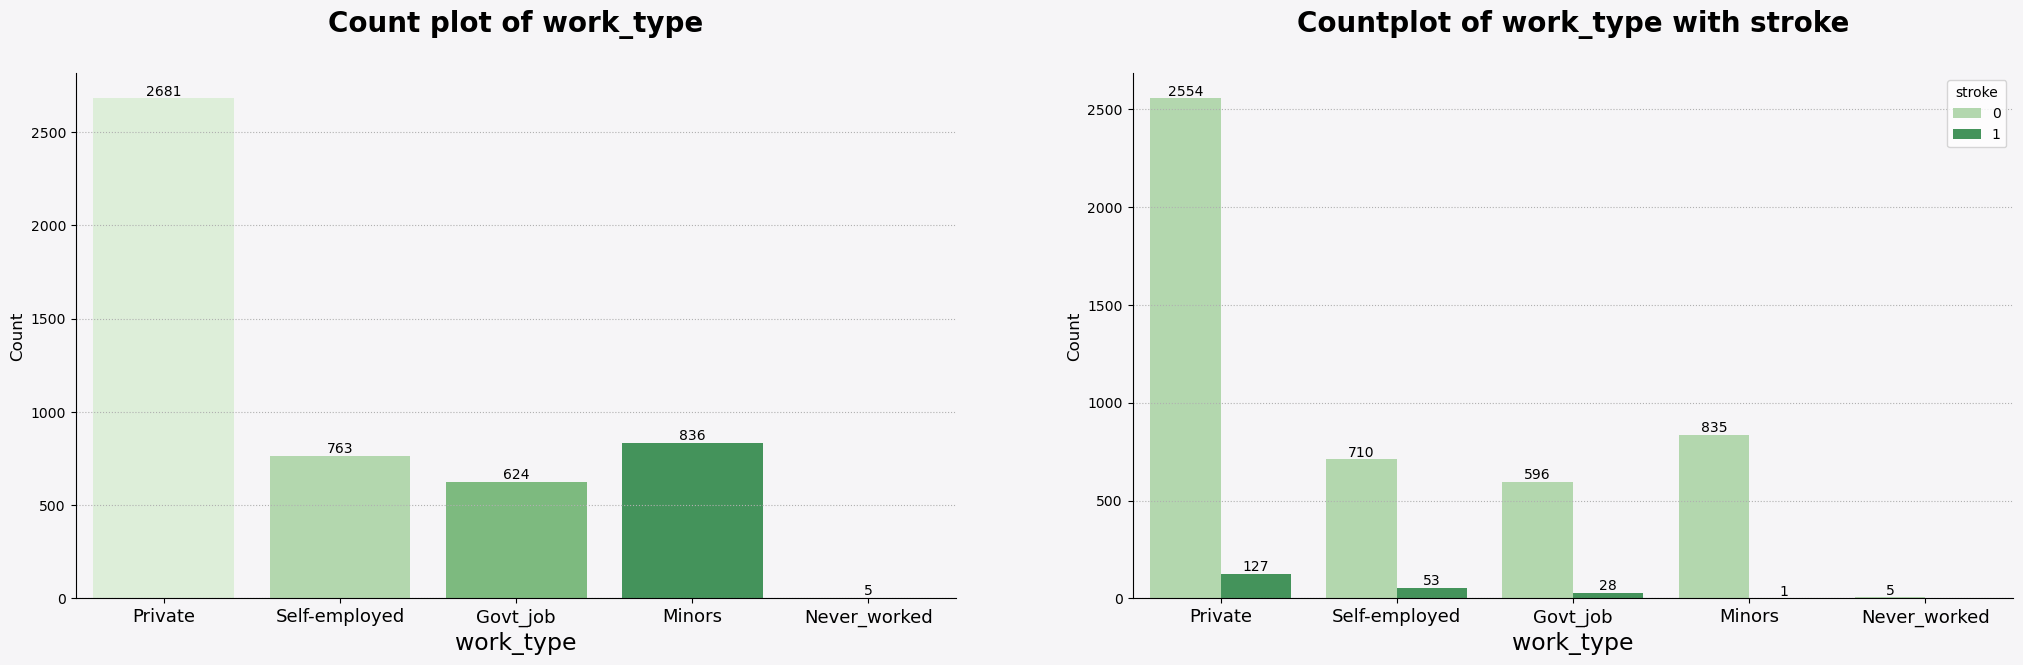

C:\Users\MariaV\AppData\Local\Temp\ipykernel_14920\3055462690.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(data=stroke, x=i,palette='Greens')


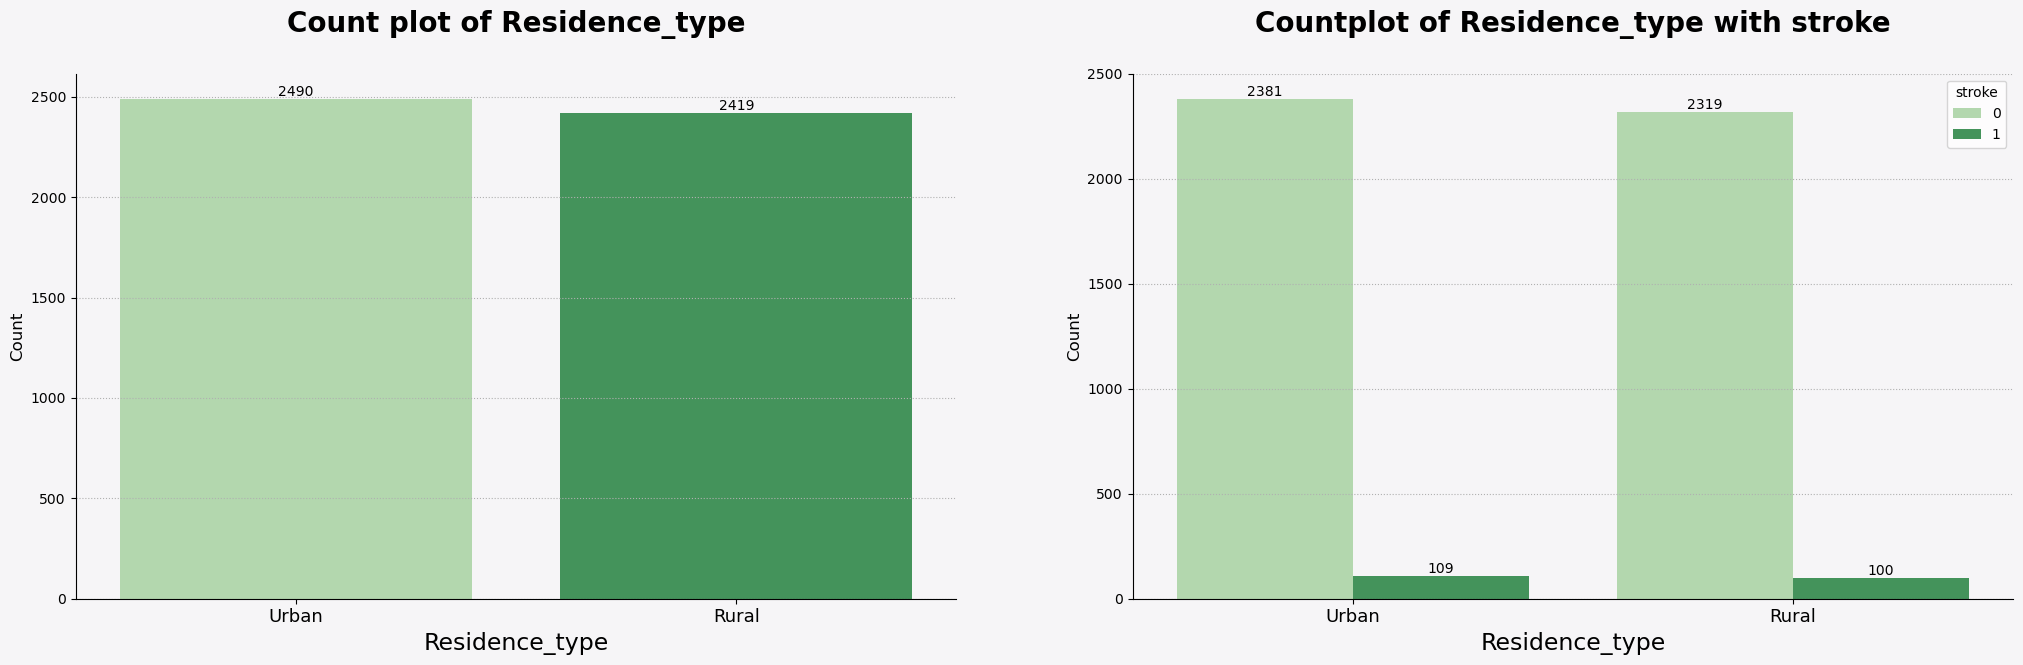

C:\Users\MariaV\AppData\Local\Temp\ipykernel_14920\3055462690.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(data=stroke, x=i,palette='Greens')


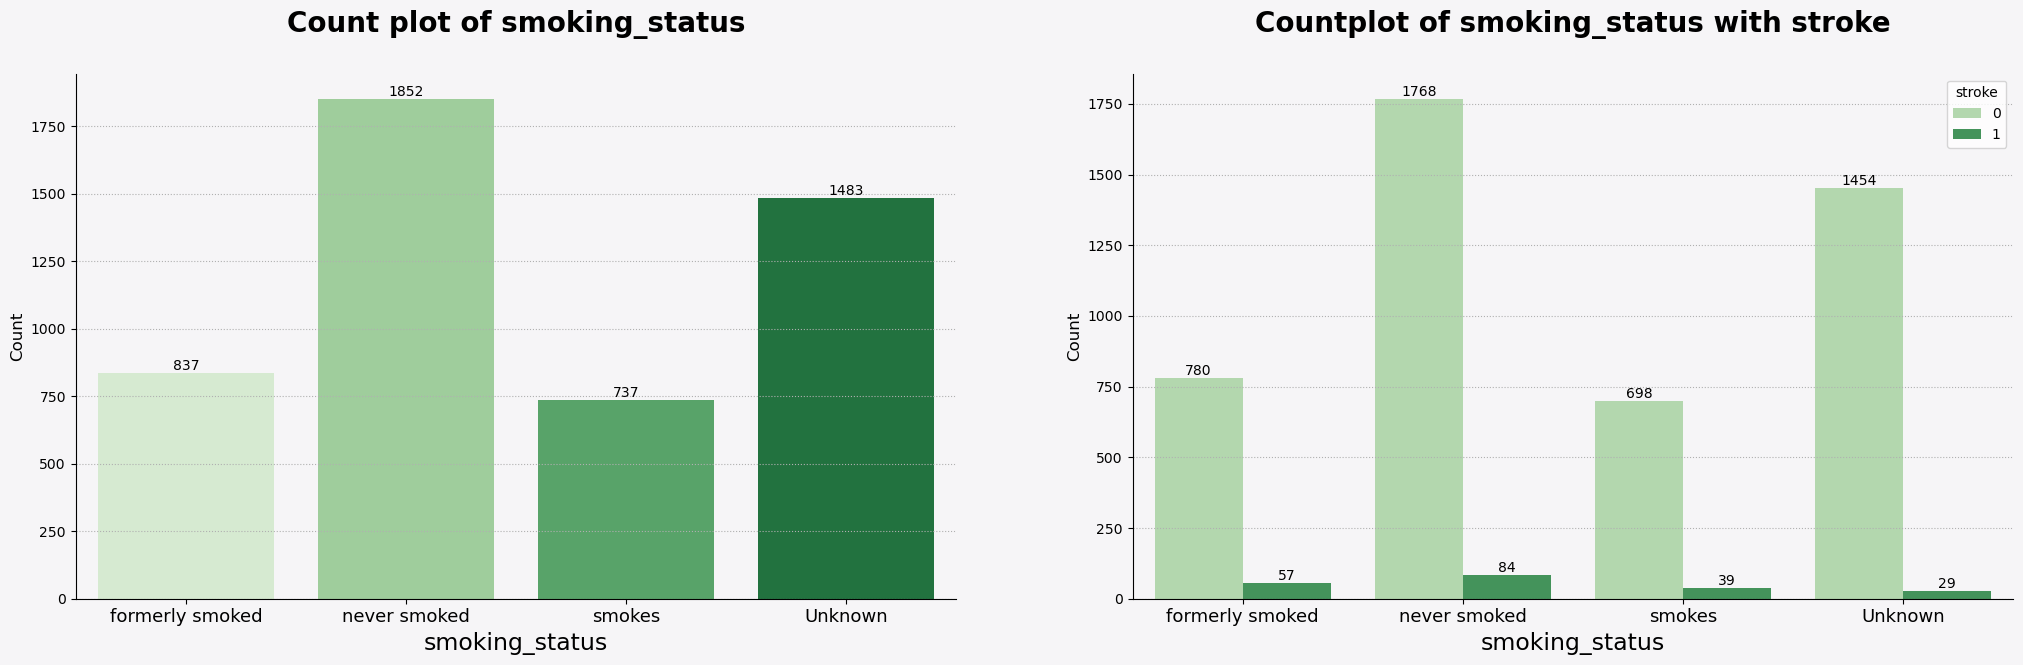

In [327]:
# Distribution of categorical variables

continuous_variables =stroke[['age','avg_glucose_level','bmi']]
categorical_variables =stroke[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

# Plot the categorical variables against the target variable 'stroke'

for i in stroke.columns:
    if stroke[i].dtype == "object":
        
        fig=plt.figure(figsize=(25,15))
        fig.patch.set_facecolor("#f6f5f7")
        
        xx=plt.subplot(2,2,1)
        xx.set_facecolor("#f6f5f7")
        x=sns.countplot(data=stroke, x=i,palette='Greens')
        
        for container in x.containers:
            x.bar_label(container)
        plt.xticks(fontsize=13)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("Count",fontsize=12)
        plt.title(f"Count plot of {i}\n",fontsize=20,weight="bold")
        
        for x in ["top","right"]:
            xx.spines[x].set_visible(False)
        xx.grid(linestyle=':',axis='y')
             
        
        vv=plt.subplot(2,2,2)
        vv.set_facecolor("#f6f5f7")
        v=sns.countplot(data=stroke,x=i,hue="stroke",palette='Greens')
        
        for container in v.containers:
            v.bar_label(container)
        plt.xticks(fontsize=13)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("Count",fontsize=12)
        plt.title(f"Countplot of {i} with stroke\n",fontsize=20,weight="bold" )
        
        for v in ["top","right"]:
            vv.spines[v].set_visible(False)
        vv.grid(linestyle=':',axis='y')
        
        plt.show()
        

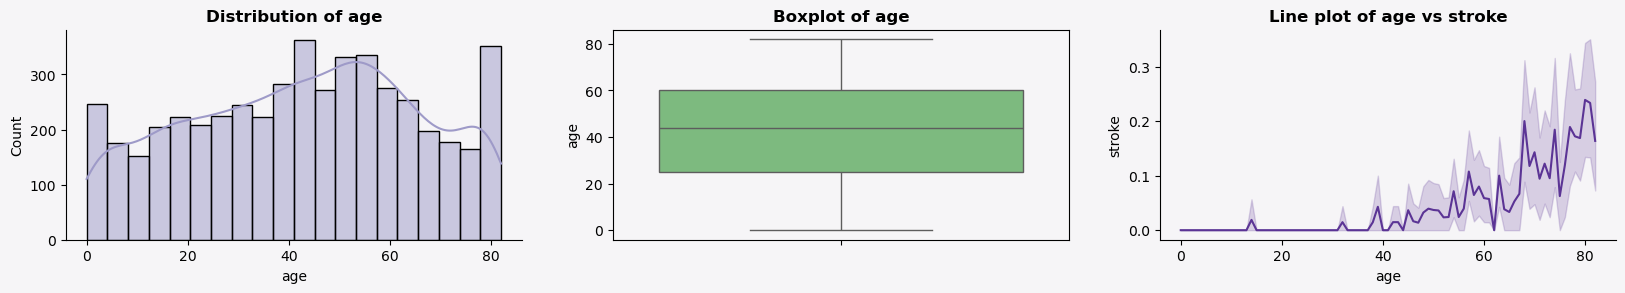

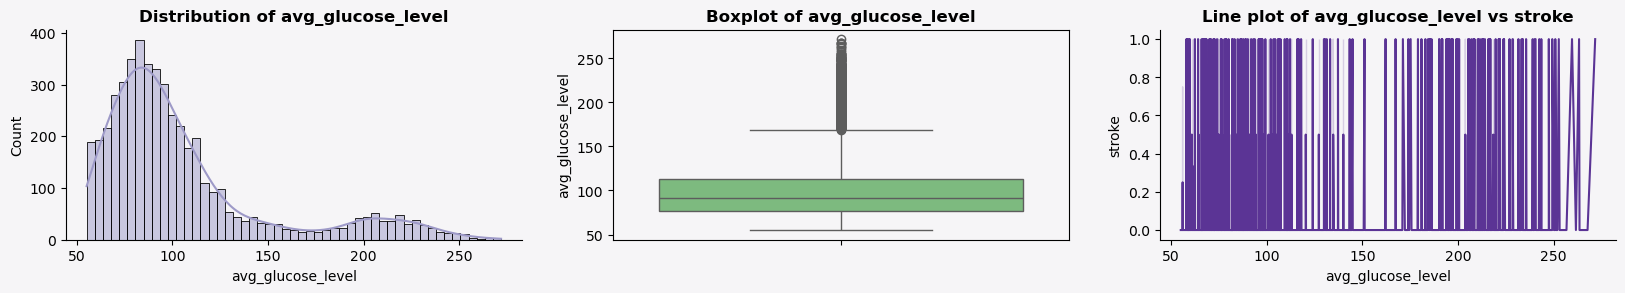

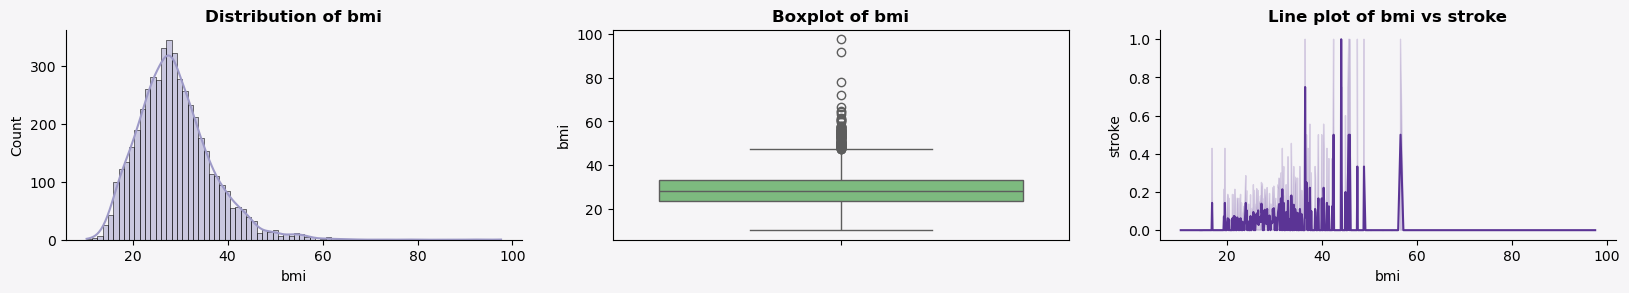

In [328]:
# Distributions of continuous variables

continuous_variables =stroke[['age','avg_glucose_level','bmi']]
categorical_variables =stroke[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

# Plot the continuous variables against the target variable 'stroke'

green_palette = sns.color_palette('Greens', n_colors=5)
purple_palette = sns.color_palette('Purples', n_colors=5)

for i in dfnumerical:
    fig=plt.figure(figsize=(20,6))
    fig.patch.set_facecolor("#f6f5f7")
        
    v=plt.subplot(2,3,1)
    v.set_facecolor('#f6f5f7')
    vv=sns.histplot(data=dfnumerical,x=i,kde=True, color=purple_palette[2])
    plt.title(f"Distribution of {i}",weight='bold')
    
    for vv in ["top","right"]:
        v.spines[vv].set_visible(False)
        
        
    b=plt.subplot(2,3,2) 
    b.set_facecolor("#f6f5f7")
    sns.boxplot(y=dfnumerical[i],color=green_palette[2] )
    plt.ylabel(i)
    plt.title(f"Boxplot of {i}",weight='bold')
        
    l=plt.subplot(2,3,3)
    l.set_facecolor("#f6f5f7")
    ll=sns.lineplot(data=stroke, x=i, y="stroke", color=purple_palette[4])

    
    for ll in ["top","right"]:
        l.spines[ll].set_visible(False)
    plt.title(f"Line plot of {i} vs stroke",weight='bold')

<Figure size 2000x1500 with 0 Axes>

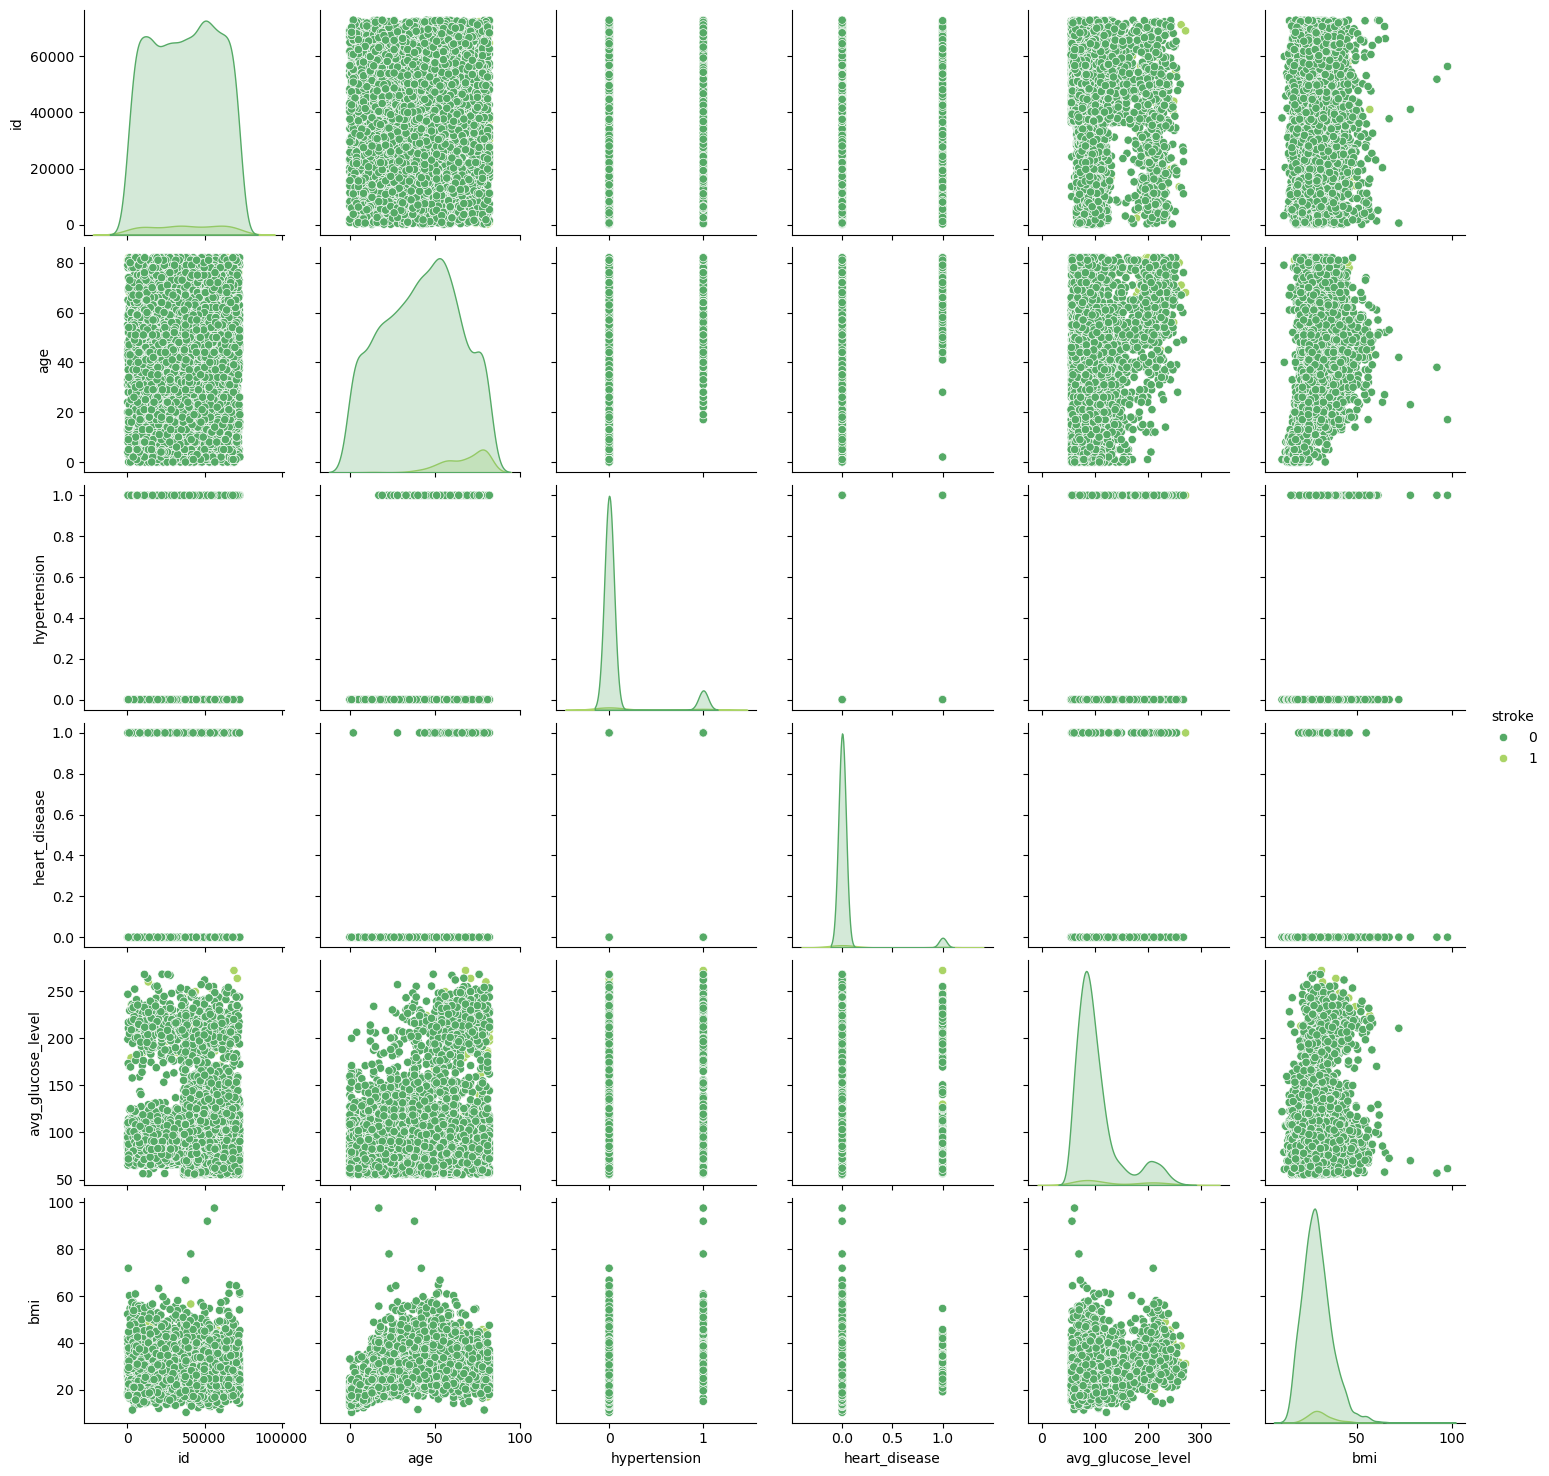

In [329]:
# Each variable in the DataFrame stroke is plotted against every other variable, creating a grid of scatter plots and histograms. 
# This can help visualize potential relationships and correlations between variables.

fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(stroke,hue="stroke",palette='summer')

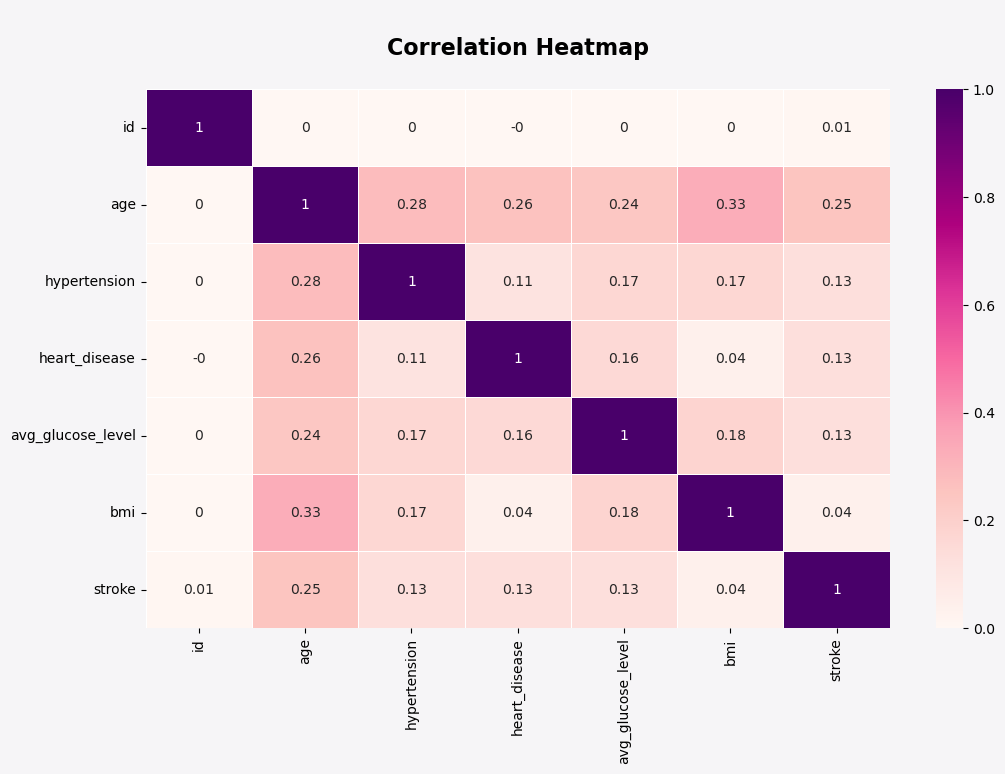

In [352]:
# CORRELATION HEATMAP 
# we can see that age is mostly related with strokes in our sample

numeric_cols = stroke.select_dtypes(include=['number'])

corr_matrix = numeric_cols.corr().round(2)
fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor('#f6f5f7')
sns.heatmap(corr_matrix, annot=True, cmap="RdPu", linewidths=.5, ax=ax)
plt.title("\nCorrelation Heatmap\n", fontsize=16, weight="bold")

plt.show()

Text(0.5, 1.0, '\nCorrelation Heatmap\n')

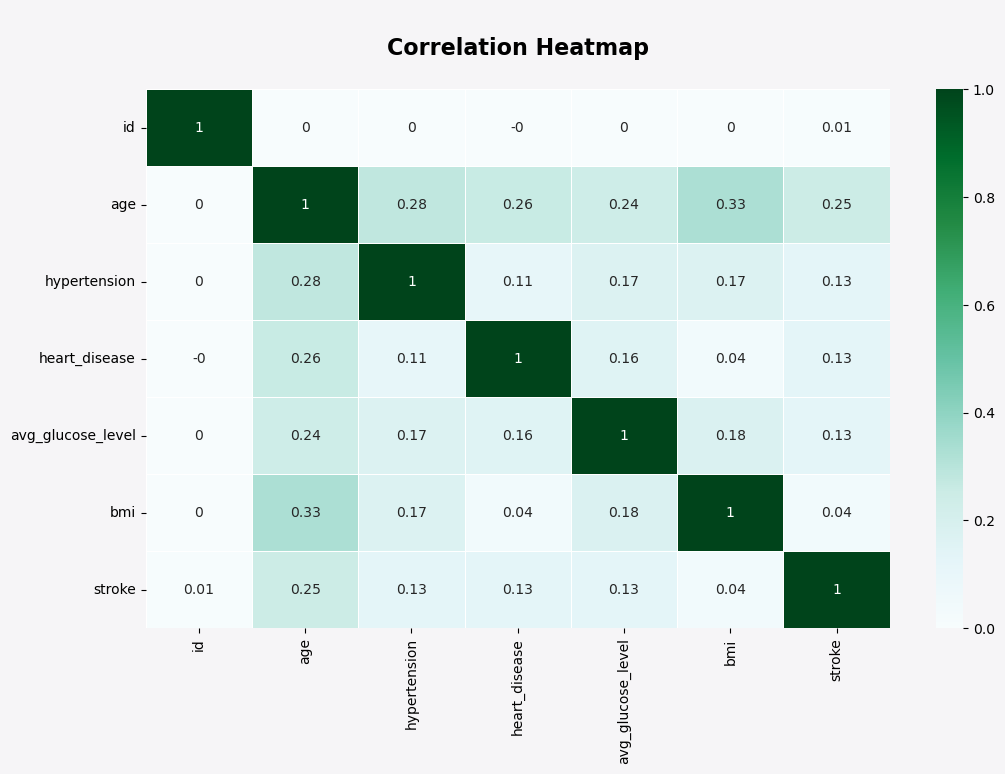

In [362]:
# Another way to present a CORRELATION HEATMAP 
# we can see that age is mostly related with strokes in our sample

colormap = plt.cm.BuGn ###  https://seaborn.pydata.org/tutorial/color_palettes.html 
#https://matplotlib.org/stable/users/explain/colors/colormaps.html   tab10, , rainbow, Oranges, reds,PuBuGn, BuGn

numeric_cols = stroke.select_dtypes(include=['number'])

corr_matrix = numeric_cols.corr().round(2)
fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor('#f6f5f7')
sns.heatmap(corr_matrix, annot=True, cmap="BuGn", linewidths=.5, ax=ax)
plt.title("\nCorrelation Heatmap\n", fontsize=16, weight="bold")



Here are some observations from the bivariate analysis with the categorical variables:

Gender: Both males and females have a similar proportion of stroke cases, with males having slightly more. The Other category has no stroke cases, but this could be due to the very small sample size for this category.

Hypertension: Patients with hypertension have a higher proportion of stroke cases than those without hypertension.

Heart_disease: Patients with heart disease also have a higher proportion of stroke cases than those without heart disease.

Ever_married: Those who have been married have a higher proportion of stroke cases than those who have not.

Work_type: Patients who are self-employed or work in private jobs have a higher proportion of stroke cases compared to other work types.

Residence_type: The proportion of stroke cases is almost equal for both urban and rural residents.

Smoking_status: The proportion of stroke cases is higher for patients who formerly smoked or currently smoke compared to those who never smoked. The stroke proportion for the 'Unknown' category is lower.